# Explore here

In [19]:
# Your code here

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/NLP-project-tutorial/main/url_spam.csv')
df.head()

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,True
1,https://www.hvper.com/,True
2,https://briefingday.com/m/v4n3i4f3,True
3,https://briefingday.com/n/20200618/m#commentform,False
4,https://briefingday.com/fan,True


In [20]:
df.duplicated().sum()

np.int64(630)

In [21]:
df.drop_duplicates(inplace=True)

In [22]:
df.shape


(2369, 2)

In [23]:
print(f"Cantidad de Spam {len(df[df['is_spam'] == True])}")
print(f"Cantidad de Ham {len(df[df['is_spam'] == False])}")

Cantidad de Spam 244
Cantidad de Ham 2125


In [24]:
!pip install regex

In [25]:
import regex as re

def preprocess_text(text):
    # Eliminar cualquier caracter que no sea una letra (a-z) o un espacio en blanco ( )
    text = re.sub(r'[^a-z ]', " ", text)
    
    # Eliminar espacios en blanco
    text = re.sub(r'\s+[a-zA-Z]\s+', " ", text)
    text = re.sub(r'\^[a-zA-Z]\s+', " ", text)

    # Reducir espacios en blanco múltiples a uno único
    text = re.sub(r'\s+', " ", text.lower())

    # Eliminar tags
    text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ", text)

    return text.split()


In [26]:
df['url'] = df['url'].apply(preprocess_text)

In [27]:
df.head()

,url,is_spam
0,"[https, briefingday, us, list, manage, com, un...",True
1,"[https, www, hvper, com]",True
2,"[https, briefingday, com, v, i]",True
3,"[https, briefingday, com, m, commentform]",False
4,"[https, briefingday, com, fan]",True


In [28]:
!pip install nltk

In [29]:

from nltk import download
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


download("wordnet")
download("stopwords")

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

stop_words.add("http")
stop_words.add("https")
stop_words.add("www")
stop_words.add("com")
stop_words.add("org")
stop_words.add("net")

def lemmatize_text(text, lemmatizer = lemmatizer,stop_words = stop_words):
    tokens = [lemmatizer.lemmatize(word) for word in text if word not in stop_words]
    tokens = [word for word in tokens if len(word) > 3]
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

df['url'] = df['url'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/scontrerasr/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/scontrerasr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
df.head()

,url,is_spam
0,"[briefingday, list, manage, unsubscribe]",True
1,[hvper],True
2,[briefingday],True
3,"[briefingday, commentform]",False
4,[briefingday],True


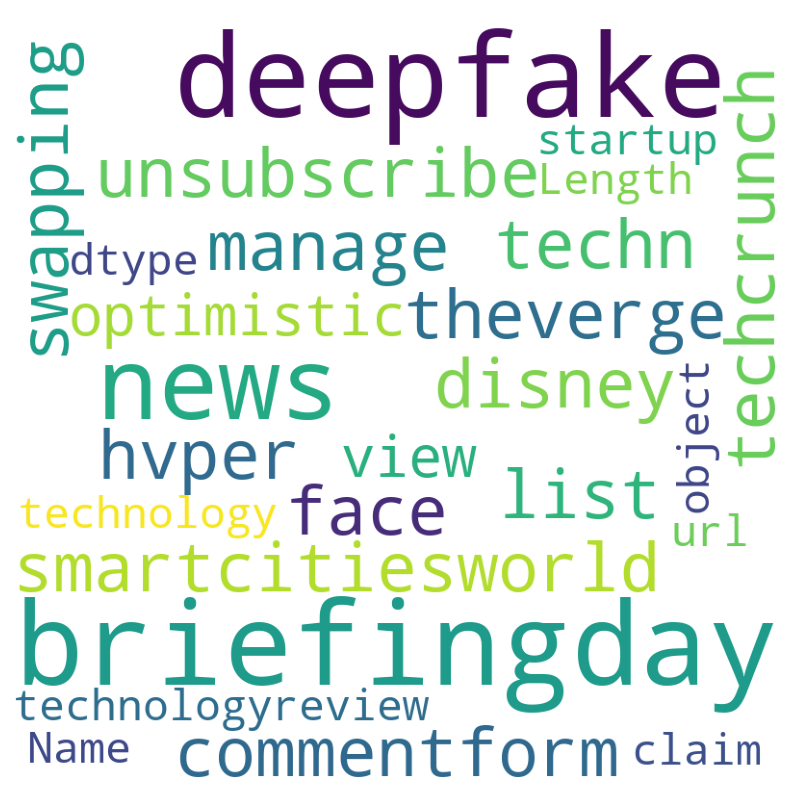

In [32]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

WordCloud = WordCloud(width=800, height=800, background_color='white',max_words=200,min_font_size=20, random_state=42).generate(str(df.url))

fig = plt.figure(figsize=(10, 10))
plt.imshow(WordCloud)
plt.axis('off')
plt.show()

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, max_df=0.8,min_df=5)
X=df['url']
y=df['is_spam']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tokens_list = [" ".join(tokens) for tokens in X_train]
tokens_list_2 = [" ".join(tokens) for tokens in X_test]

X_train_vec = vectorizer.fit_transform(tokens_list).toarray()
X_test_vec= vectorizer.transform(tokens_list_2).toarray()

In [35]:
from sklearn.svm import SVC

model = SVC(kernel='linear', C=1.0, random_state=42)
model.fit(X_train_vec, y_train) 


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [36]:
y_pred = model.predict(X_test_vec)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_test, y_pred)

0.9556962025316456

In [39]:
from pickle import dump

dump(model, open('../models/svm_lineal_C_1_42.pkl', 'wb'))

Conclusión: el modelo es muy bueno para predecir si un URL tiene o no Spam ya que tuvo un accuracy score de 95,5%